### Create dictionary to match Elo team abbrev with Pro Ft Ref's abbrevs

In [1]:
import pandas as pd
import re
import numpy as np
import pipeline as p
import datetime as dt

# from collections import defaultdict

%load_ext autoreload
%autoreload 2

In [20]:
from collections import defaultdict

In [2]:
stats_df = p.open_pkl('merged_df.pkl')

In [5]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 5873
Data columns (total 32 columns):
1stD-O                5874 non-null float64
Day                   5874 non-null object
Location              2948 non-null object
OT                    364 non-null object
Opp                   5874 non-null object
PassY                 5873 non-null float64
PtsOpp                5874 non-null float64
PtsTm                 5874 non-null float64
Record                5874 non-null object
Result                5874 non-null object
RushY                 5874 non-null float64
TO                    4520 non-null float64
TO-D                  4520 non-null float64
Team                  5874 non-null object
Time                  5874 non-null object
TotY                  5874 non-null float64
Week                  5874 non-null int64
Year                  5874 non-null int64
Date                  5874 non-null datetime64[ns]
Time of Possession    5825 non-null object
RushAtt             

In [11]:
stats_df.head()

,1stD-O,Day,Location,OT,Opp,PassY,PtsOpp,PtsTm,Record,Result,...,PassCmp,PassAtt,PassTDs,SacksO,Fumbles,Penalies,PenY,3rdDConv,3rdDAtt,4thDAtt
0,20.0,Sun,@,NaN,Miami Dolphins,226.0,33.0,20.0,0-1,L,...,29.0,56.0,0.0,4.0,3.0,9.0,100.0,5.0,17.0,4.0
1,16.0,Sun,@,NaN,Minnesota Vikings,142.0,7.0,30.0,1-1,W,...,14.0,21.0,0.0,1.0,1.0,15.0,163.0,5.0,14.0,1.0
2,21.0,Sun,NaN,NaN,Oakland Raiders,221.0,9.0,16.0,2-1,W,...,24.0,37.0,0.0,2.0,1.0,6.0,59.0,9.0,18.0,1.0
3,13.0,Mon,@,NaN,Kansas City Chiefs,215.0,41.0,14.0,2-2,L,...,20.0,30.0,2.0,3.0,2.0,3.0,30.0,2.0,9.0,0.0
4,30.0,Sun,NaN,NaN,Cincinnati Bengals,285.0,17.0,43.0,3-2,W,...,23.0,35.0,0.0,1.0,1.0,12.0,114.0,6.0,16.0,1.0


In [3]:
elo_df = p.open_pkl('elo_df')
elo_teams = elo_df['Team'].unique()
elo_teams = [x.lower() for x in elo_teams]

In [14]:
# import team_dict

In [4]:
team_dict = p.open_pkl('team_dictionary.pkl')
url_team_dict = p.open_pkl('url_team_dict.pkl') 

stats_teams = [x[2] for x in team_dict.values()]

In [5]:
same = list(set(stats_teams).intersection(elo_teams))

diff = np.setdiff1d(stats_teams, elo_teams)
diff

url_team_dict['oti']

elo_subtract = [x for x in elo_teams if x not in same]

elo_subtract.sort()

elo_subtract

# Manually created 'diff_elos' (the Elo team abbreviation for teams who abbreviations are different)

same_elos = [x for x in same]
diff_elos = ['ind','ari','gb','hou','kc','no','ne','ten','oak','stl','bal','sd','sf','tb','wsh']

# Can't just "add" the lists because the dtype of diff is weird ('<U3'). So, a work-around:

stats_teams2 = same
stats_teams2.extend(diff)

elo_teams2 = same_elos
elo_teams2.extend(diff_elos)

elo_stats_dict = {}

for i in range(len(stats_teams2)):
    elo_stats_dict[elo_teams2[i]] = stats_teams2[i]

In [13]:
elo_df['TeamStats'] = elo_df['Team'].apply(lambda x: elo_stats_dict[x.lower()] if x.lower() in elo_teams2 else None)

In [14]:
elo_df.sample(10)

,Year,Elo,Team,TeamStats
5112,2018.182,1454.22,Sf,sfo
8192,2017.773,1568.36,Dal,dal
2815,1945.462,1559.30,Wsh,was
5340,1989.714,1560.32,Ind,clt
6202,1978.095,1517.65,Sd,sdg
1600,2014.643,1645.30,Gb,gnb
95,1922.818,1676.20,Chi,chi
1415,1982.714,1505.31,Gb,gnb
5767,2014.591,1703.51,Ne,nwe
104,1924.900,1617.48,Chi,chi


In [48]:
p.pkl_this('elo_stats_team_dict.pkl', elo_stats_dict)

### Now, have to figure out how to line up Elo's fractional year with Stats' Week number

In [18]:
snip = elo_df[(elo_df['Team'] == 'Gb') & (elo_df['Year'] >= 2008)]
snip.head()

,Year,Elo,Team,TeamStats
1565,2008.000,1579.371,Gb,gnb
1566,2008.091,1610.890,Gb,gnb
1567,2008.227,1532.440,Gb,gnb
1568,2008.500,1597.880,Gb,gnb
1569,2008.734,1495.180,Gb,gnb


In [24]:
rems = defaultdict(int)
yrs = defaultdict(int)

for x in snip['Year']:
    y = int(x)
    rem = x-y
    rems[rem] += 1
    yrs[y] += 1

In [22]:
rems

defaultdict(int,
            {0.0: 6,
             0.026000000000067303: 1,
             0.04500000000007276: 3,
             0.07099999999991269: 1,
             0.0909999999998945: 7,
             0.13599999999996726: 2,
             0.18200000000001637: 1,
             0.22700000000008913: 4,
             0.27299999999991087: 2,
             0.31799999999998363: 2,
             0.36400000000003274: 1,
             0.4090000000001055: 1,
             0.45499999999992724: 1,
             0.5: 4,
             0.5450000000000728: 1,
             0.5909999999998945: 1,
             0.6359999999999673: 1,
             0.6430000000000291: 1,
             0.6820000000000164: 3,
             0.7270000000000891: 2,
             0.7339999999999236: 1,
             0.7729999999999109: 5,
             0.8179999999999836: 1,
             0.8640000000000327: 2,
             0.9990000000000236: 1})

In [25]:
yrs

defaultdict(int,
            {2008: 6,
             2009: 6,
             2010: 6,
             2011: 2,
             2012: 7,
             2013: 4,
             2014: 7,
             2015: 6,
             2016: 4,
             2017: 3,
             2018: 4})

In [23]:
snip['Year']

1565    2008.000
1566    2008.091
1567    2008.227
1568    2008.500
1569    2008.734
1570    2008.773
1571    2009.000
1572    2009.045
1573    2009.091
1574    2009.318
1575    2009.409
1576    2009.773
1577    2010.000
1578    2010.091
1579    2010.273
1580    2010.500
1581    2010.682
1582    2011.000
1583    2010.999
1584    2011.636
1585    2012.045
1586    2012.071
1587    2012.227
1588    2012.318
1589    2012.500
1590    2012.545
1591    2012.727
1592    2013.045
1593    2013.364
1594    2013.727
1595    2013.773
1596    2014.026
1597    2014.091
1598    2014.136
1599    2014.591
1600    2014.643
1601    2014.682
1602    2014.864
1603    2015.000
1604    2015.273
1605    2015.455
1606    2015.682
1607    2015.773
1608    2015.818
1609    2016.091
1610    2016.227
1611    2016.500
1612    2016.864
1613    2017.091
1614    2017.227
1615    2017.773
1616    2018.000
1617    2018.091
1618    2018.136
1619    2018.182
Name: Year, dtype: float64

In [30]:
snip = elo_df[(elo_df['Team'] == 'Pit') & (elo_df['Year'] >= 2008)]

rems = defaultdict(int)
yrs = defaultdict(int)

for x in snip['Year']:
    y = int(x)
    rem = x-y
    rems[rem] += 1
    yrs[y] += 1

yrs

defaultdict(int,
            {2008: 1,
             2009: 5,
             2010: 7,
             2011: 5,
             2012: 7,
             2013: 3,
             2014: 7,
             2015: 6,
             2016: 4,
             2017: 3,
             2018: 1})

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

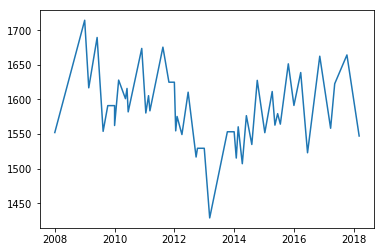

In [32]:
plt.plot(snip['Year'], snip['Elo'])

In [33]:
snip

,Year,Elo,Team,TeamStats
3522,2008.000,1552.214,Pit,pit
3523,2009.000,1714.350,Pit,pit
3524,2009.136,1616.790,Pit,pit
3525,2009.416,1689.470,Pit,pit
3526,2009.617,1553.950,Pit,pit
3527,2009.773,1591.090,Pit,pit
3528,2010.000,1591.090,Pit,pit
3529,2010.000,1562.390,Pit,pit
3530,2010.136,1627.930,Pit,pit
3531,2010.364,1601.150,Pit,pit


### Try loading five-thirty-eight's data:

In [34]:
fte_elos = pd.read_csv('Data/nfl_games.csv')

In [35]:
fte_elos.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


In [41]:
fte_elos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007 entries, 0 to 16006
Data columns (total 12 columns):
date         16007 non-null object
season       16007 non-null int64
neutral      16007 non-null int64
playoff      16007 non-null int64
team1        16007 non-null object
team2        16007 non-null object
elo1         16007 non-null float64
elo2         16007 non-null float64
elo_prob1    16007 non-null float64
score1       16007 non-null int64
score2       16007 non-null int64
result1      16007 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.5+ MB


In [43]:
fte_elos['date'] = pd.to_datetime(fte_elos['date'], format='%Y-%m-%d')

In [46]:
snip = fte_elos[(fte_elos['team1'] == 'GB') & (fte_elos['date'] >= dt.datetime(2008,1,1))]

In [47]:
snip

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
13330,2008-01-12,2007,0,1,GB,SEA,1614.902000,1574.675000,0.646967,42,20,1.0
13335,2008-01-20,2007,0,1,GB,NYG,1636.030000,1582.345000,0.664454,20,23,0.0
13352,2008-09-08,2008,0,0,GB,MIN,1579.371000,1506.395000,0.688744,24,19,1.0
13369,2008-09-21,2008,0,0,GB,DAL,1610.895000,1611.058000,0.592240,16,27,0.0
13404,2008-10-05,2008,0,0,GB,ATL,1556.313000,1405.037000,0.776430,24,27,0.0
13432,2008-10-19,2008,0,0,GB,IND,1557.537000,1618.557000,0.505727,34,14,1.0
13489,2008-11-16,2008,0,0,GB,CHI,1572.129000,1549.513000,0.623483,37,3,1.0
13521,2008-11-30,2008,0,0,GB,CAR,1561.939000,1521.915000,0.646700,31,35,0.0
13537,2008-12-07,2008,0,0,GB,HOU,1540.079000,1492.970000,0.655962,21,24,0.0
13590,2008-12-28,2008,0,0,GB,DET,1495.184000,1247.285000,0.858294,31,21,1.0


Just use this.